In [2]:
import pandas as pd
import numpy as np


In [3]:
def load_data():
    for i in range(2, 20):
        df = pd.DataFrame()
        if(i>9):
            df = df.append(
                pd.read_csv('../data/energy_price/PUB_PriceHOEPPredispOR_20'+str(i)+'.csv', skiprows=3))
        else: 
            df = df.append(
                pd.read_csv('../data/energy_price/PUB_PriceHOEPPredispOR_200'+str(i)+'.csv', skiprows=3))
        df = clean_data(df)
    return df

def clean_data(df):
    try:
        df['HOEP'] = pd.to_numeric(df['HOEP'].str.replace(',', ''))
    except:
        print("Already Number")
    return df

In [4]:
first = load_data()

Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number
Already Number


In [5]:
np.mean(pd.to_numeric(first.loc[first['Hour']==1]['HOEP']))

10.718273972602736

In [6]:
def get_hour_stats(df, num):
    return np.mean(df.loc[first['Hour']==num]['HOEP']), np.std(df.loc[first['Hour']==num]['HOEP'])

In [7]:
#mean and std by hour for energy price
for i in range(1, 24):
    print(get_hour_stats(first, i))

(10.718273972602736, 15.111764374164975)
(9.455753424657528, 13.308578294212085)
(8.504684931506846, 12.369171851744646)
(8.584602739726023, 13.042182528862122)
(8.018109589041092, 11.834504022874896)
(10.04164383561643, 12.520867164780501)
(14.577342465753427, 15.348653050732441)
(22.41021917808219, 54.013056153308476)
(22.558383561643833, 56.546490625366474)
(20.901178082191763, 32.10223856801696)
(20.614821917808193, 21.127046660258127)
(18.217424657534245, 16.129971573336757)
(17.40013698630137, 14.942157946254758)
(16.34912328767122, 12.97689659582648)
(16.637835616438355, 13.50171650073163)
(17.826849315068483, 13.431763363739174)
(21.88613698630137, 17.563587196643837)
(23.791808219178087, 19.939613810756814)
(25.067205479452063, 26.15987593439586)
(23.03158904109589, 17.649933825663233)
(20.874794520547937, 16.317566491075034)
(17.2415616438356, 12.940224936100801)
(14.037945205479458, 12.41287327338465)


In [10]:
first.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2019-01-01,1,0.00,0.00,0.00,-0.02,1.24,0.20,0.1
1,2019-01-01,2,0.00,0.00,0.00,-0.02,1.23,0.19,0.1
2,2019-01-01,3,-0.11,-0.13,-0.13,-0.25,1.25,0.19,0.1
3,2019-01-01,4,-1.84,-2.13,-3.00,-2.13,1.25,0.19,0.1
4,2019-01-01,5,-0.47,-0.13,-3.00,-3.00,1.25,0.19,0.1


In [13]:
first[first.columns].describe()

,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
count,8760.000000,8760.000000,8739.000000,8739.000000,8739.000000,8760.000000,8760.000000,8760.000000
mean,12.500000,16.715850,18.643486,18.151833,17.889567,6.394514,5.764514,4.204703
std,6.922582,23.550614,27.611937,22.241228,14.650236,18.204363,17.961848,16.285921
min,1.000000,-59.290000,-50.000000,-5.000000,-15.000000,0.100000,0.100000,0.010000
25%,6.750000,3.017500,5.840000,5.850000,5.770000,0.410000,0.200000,0.200000
50%,12.500000,14.360000,18.490000,18.380000,18.850000,1.270000,0.430000,0.380000
75%,18.250000,25.560000,26.290000,26.180000,26.460000,8.102500,6.457500,4.112500
max,24.000000,1028.520000,2000.000000,1500.000000,230.170000,925.910000,925.910000,925.820000


not numeric


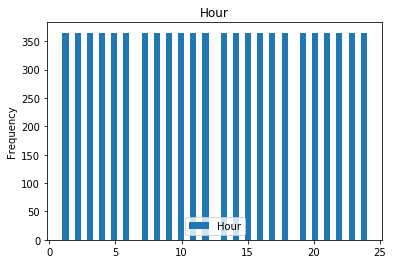

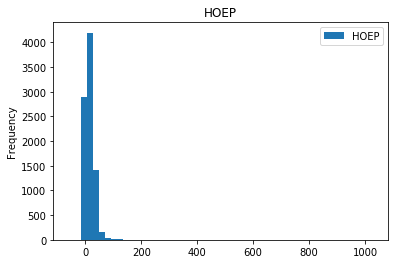

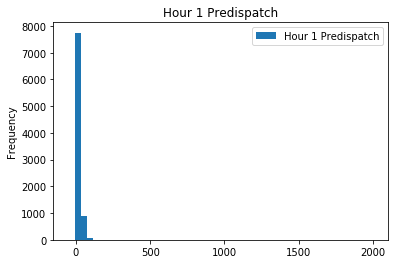

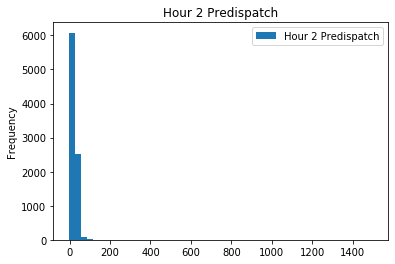

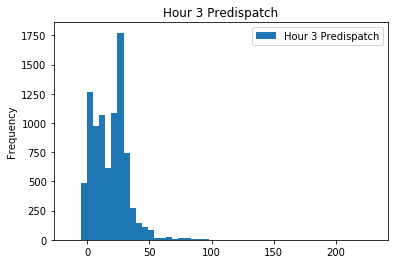

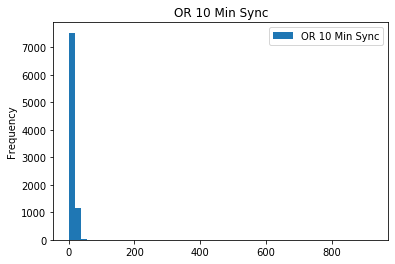

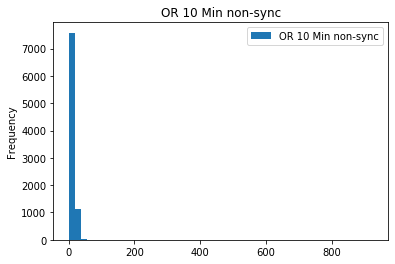

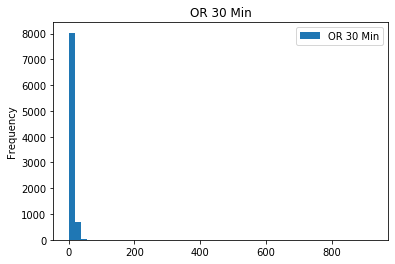

In [25]:
for c in first.columns:
    try:
        first[[c]].plot.hist(bins = 50, title = c)
    except:
        print("not numeric")

In [22]:
corr = first[first.columns].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
Hour,1,0.12,0.11,0.14,0.22,0.077,0.081,0.065
HOEP,0.12,1,0.3,0.35,0.51,0.65,0.64,0.64
Hour 1 Predispatch,0.11,0.3,1,0.96,0.55,0.0023,0.007,0.012
Hour 2 Predispatch,0.14,0.35,0.96,1,0.66,-0.0078,9.1e-05,0.0061
Hour 3 Predispatch,0.22,0.51,0.55,0.66,1,-0.021,-0.0092,-0.00031
OR 10 Min Sync,0.077,0.65,0.0023,-0.0078,-0.021,1,0.99,0.92
OR 10 Min non-sync,0.081,0.64,0.007,9.1e-05,-0.0092,0.99,1,0.92
OR 30 Min,0.065,0.64,0.012,0.0061,-0.00031,0.92,0.92,1


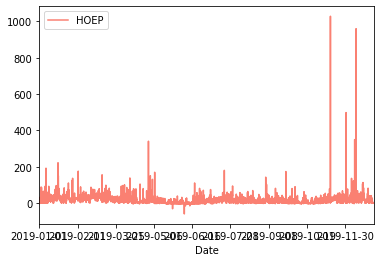

In [26]:
ax = first.plot.line(x = 'Date', y = 'HOEP', color = 'salmon')

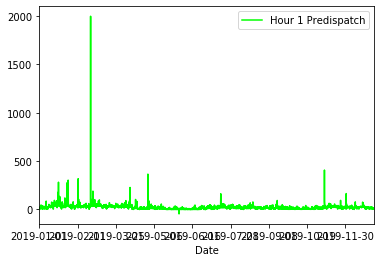

In [27]:
first.plot.line(x = 'Date', y = 'Hour 1 Predispatch', color = 'lime')

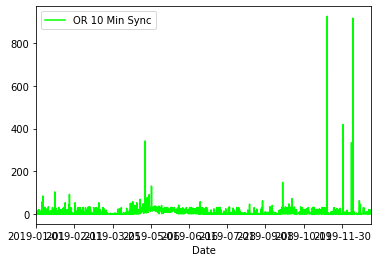

In [29]:
first.plot.line(x = 'Date', y = 'OR 10 Min Sync', color = 'lime')